<a href="https://colab.research.google.com/github/jacobdwatters/NIOSH-Project/blob/main/ViolationDataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Setup

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load and Process Data

#### Specify columns to use

In [21]:
FEATURES = ['MINE_ID', 'MINE_TYPE', 'COAL_METAL_IND', 'SIG_SUB', 'SECTION_OF_ACT', 'LIKELIHOOD', 
            'INJ_ILLNESS', 'NO_AFFECTED', 'NEGLIGENCE', 'VIOLATOR_VIOLATION_CNT',
            'VIOLATOR_INSPECTION_DAY_CNT']
TARGETS = ['PROPOSED_PENALTY']

#### Load the data using the specified columns

In [29]:
violation_data = pd.read_csv("https://arlweb.msha.gov/OpenGovernmentData/DataSets/Violations.zip", 
                             encoding='latin-1', compression='zip', sep='|', 
                             usecols = [*FEATURES, *TARGETS])

#### Fill na values

In [30]:
violation_data['MINE_TYPE'].fillna('Facility', inplace=True)
violation_data['COAL_METAL_IND'].fillna('M', inplace=True)
violation_data['SIG_SUB'].fillna('N', inplace=True)
# violation_data['SECTION_OF_ACT'].fillna('316(b)', inplace=True)
violation_data['LIKELIHOOD'].fillna('NoLikelihood', inplace=True)
violation_data['INJ_ILLNESS'].fillna('NoLostDays', inplace=True)
violation_data['NO_AFFECTED'].fillna(0, inplace=True)
violation_data['NEGLIGENCE'].fillna('NoNegligence', inplace=True)
violation_data['VIOLATOR_VIOLATION_CNT'].fillna(0, inplace=True)
violation_data['VIOLATOR_INSPECTION_DAY_CNT'].fillna(0, inplace=True)

violation_data['PROPOSED_PENALTY'].fillna(violation_data['PROPOSED_PENALTY'].mean(), inplace=True)

#### Save data to Google drive

In [42]:
path = '/content/gdrive/My Drive/NIOSH Project/data/violations_processed.csv'
with open(path, 'w', encoding='utf-8') as f:
  violation_data.to_csv(f)

## Data Exploration and Analysis

In [43]:
violation_data.head(20)

,MINE_ID,MINE_TYPE,COAL_METAL_IND,SIG_SUB,SECTION_OF_ACT,LIKELIHOOD,INJ_ILLNESS,NO_AFFECTED,NEGLIGENCE,PROPOSED_PENALTY,VIOLATOR_VIOLATION_CNT,VIOLATOR_INSPECTION_DAY_CNT
0,1516011.0,Underground,C,Y,NaN,Reasonably,LostDays,1.0,ModNegligence,475.0,0.0,0.0
1,1517821.0,Surface,C,Y,NaN,Reasonably,LostDays,1.0,ModNegligence,872.0,0.0,0.0
2,1516011.0,Underground,C,N,NaN,Unlikely,NoLostDays,1.0,ModNegligence,259.0,0.0,0.0
3,1507201.0,Underground,C,Y,NaN,Reasonably,LostDays,1.0,ModNegligence,277.0,0.0,0.0
4,3600884.0,Surface,C,Y,NaN,Reasonably,Fatal,1.0,LowNegligence,150.0,0.0,0.0
5,1516011.0,Underground,C,Y,NaN,Reasonably,LostDays,1.0,ModNegligence,475.0,0.0,0.0
6,1517821.0,Surface,C,Y,NaN,Reasonably,LostDays,3.0,ModNegligence,760.0,0.0,0.0
7,1518076.0,Surface,C,Y,NaN,Reasonably,Permanent,1.0,ModNegligence,173.0,0.0,0.0
8,4608564.0,Surface,C,Y,NaN,Reasonably,LostDays,1.0,ModNegligence,97.0,0.0,0.0
9,1516011.0,Underground,C,N,NaN,Unlikely,LostDays,1.0,ModNegligence,340.0,0.0,0.0


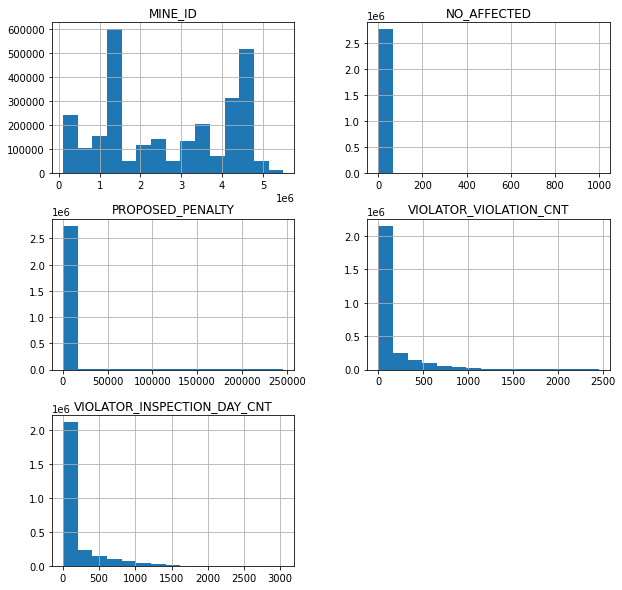

In [33]:
hist = violation_data.hist(figsize=(10,10), bins=15)

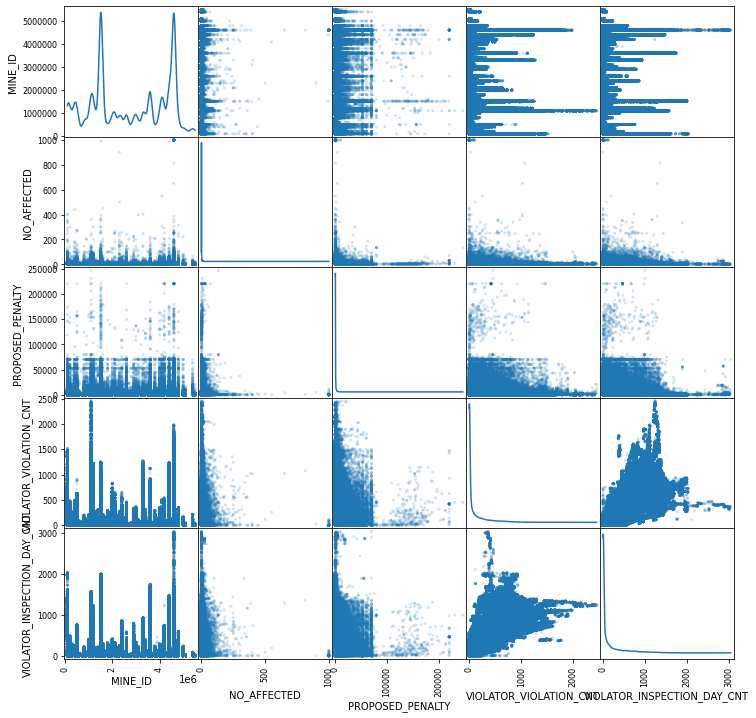

In [34]:
scat_mat = pd.plotting.scatter_matrix(violation_data, alpha=0.2, figsize=(12, 12), diagonal="kde")

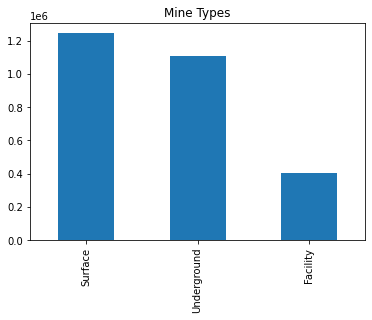

In [35]:
plt.title('Mine Types')
violation_data.MINE_TYPE.value_counts().plot.bar()

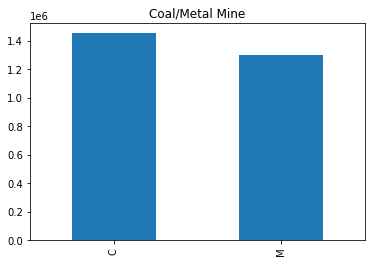

In [36]:
plt.title('Coal/Metal Mine')
violation_data.COAL_METAL_IND.value_counts().plot.bar()

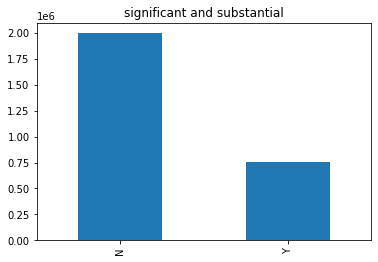

In [41]:
plt.title('significant and substantial')
violation_data.SIG_SUB.value_counts().plot.bar()

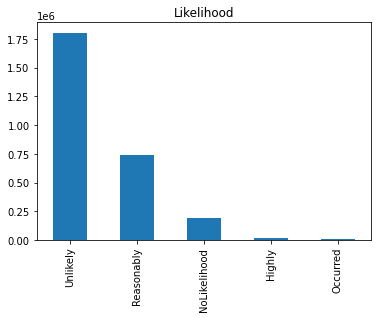

In [37]:
plt.title('Likelihood')
violation_data.LIKELIHOOD.value_counts().plot.bar()

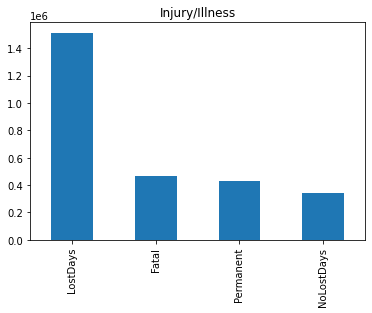

In [38]:
plt.title('Injury/Illness')
violation_data.INJ_ILLNESS.value_counts().plot.bar()

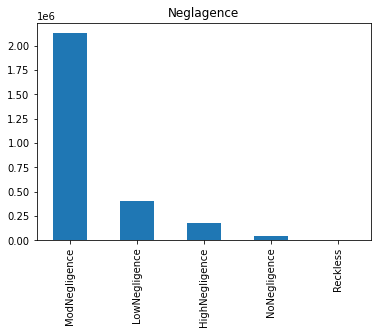

In [39]:
plt.title('Neglagence')
violation_data.NEGLIGENCE.value_counts().plot.bar()

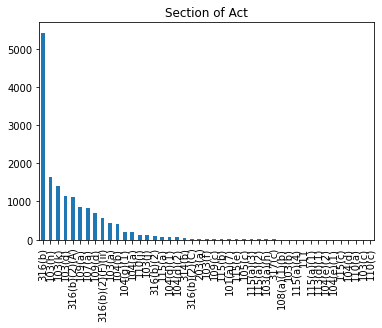

In [40]:
plt.title('Section of Act')
violation_data.SECTION_OF_ACT.value_counts().plot.bar()